# 乳癌資料庫預測SVM分類
>使用scikit-learn 機器學習套件裡的SVR演算法

* (一)引入函式庫及內建乳癌資料集<br>
引入之函式庫如下<br>
sklearn.datasets: 用來匯入內建之乳癌資料集`datasets.load_breast_cancer()`<br>
sklearn.SVR: 支持向量機回歸分析之演算法<br>
matplotlib.pyplot: 用來繪製影像

In [117]:
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import os,sys
sys.path.append(os.path.abspath('./')) #for import utility
from utility import plot_confusion_matrix,plot_decision_regions

## Step1. 下載資料

In [50]:
breast_cancer=datasets.load_breast_cancer()
features=breast_cancer.data
target=breast_cancer.target
print(breast_cancer.keys())
print(breast_cancer.feature_names)
print(breast_cancer.target_names)
print(breast_cancer.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from cen

In [51]:
x = pd.DataFrame(features, columns=breast_cancer['feature_names'])
x.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [52]:
features

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [53]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [54]:
target_names=breast_cancer.target_names
labels=target_names[target]

In [55]:
labels

array(['malignant', 'malignant', 'malignant', 'malignant', 'malignant',
       'malignant', 'malignant', 'malignant', 'malignant', 'malignant',
       'malignant', 'malignant', 'malignant', 'malignant', 'malignant',
       'malignant', 'malignant', 'malignant', 'malignant', 'benign',
       'benign', 'benign', 'malignant', 'malignant', 'malignant',
       'malignant', 'malignant', 'malignant', 'malignant', 'malignant',
       'malignant', 'malignant', 'malignant', 'malignant', 'malignant',
       'malignant', 'malignant', 'benign', 'malignant', 'malignant',
       'malignant', 'malignant', 'malignant', 'malignant', 'malignant',
       'malignant', 'benign', 'malignant', 'benign', 'benign', 'benign',
       'benign', 'benign', 'malignant', 'malignant', 'benign',
       'malignant', 'malignant', 'benign', 'benign', 'benign', 'benign',
       'malignant', 'benign', 'malignant', 'malignant', 'benign',
       'benign', 'benign', 'benign', 'malignant', 'benign', 'malignant',
       'malignan

## Step2. 區分訓練集與測試集

In [98]:
mean_radius=features[labels=='malignant',0]
mean_texture=features[labels=='malignant',1]
malignant=np.c_[mean_radius,mean_texture]

In [99]:
mean_radius=features[labels=='benign',0]
mean_texture=features[labels=='benign',1]
benign=np.c_[mean_radius,mean_texture]

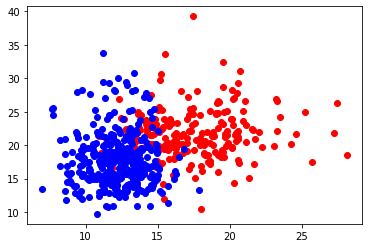

In [100]:
plt.scatter(malignant[:,0],malignant[:,1],color='red')
plt.scatter(benign[:,0],benign[:,1],color='blue')

In [101]:
training_data=np.r_[malignant, benign]
training_labels=np.r_[np.zeros(len(malignant)),np.ones(len(benign))]

In [102]:
print(training_data.shape)
print(training_data)

(569, 2)
[[17.99 10.38]
 [20.57 17.77]
 [19.69 21.25]
 ...
 [14.05 27.15]
 [11.2  29.37]
 [ 7.76 24.54]]


In [103]:
X_train, X_test, y_train, y_test = train_test_split(training_data, training_labels,test_size=0.3,random_state=0)
X_train.shape


(398, 2)

## Step3. 建模

In [104]:
clf=svm.LinearSVC()
clf.fit(training_data,training_labels)

C:\Users\changerica\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

## Step4. 預測

```

```


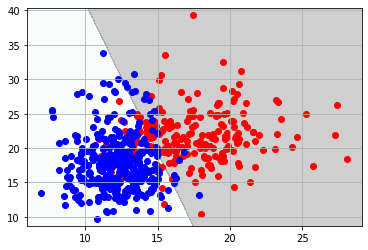

0.8844221105527639
0.8830409356725146


In [105]:
training_x_min=training_data[:,0].min()-1
training_x_max=training_data[:,0].max()+1
training_y_min=training_data[:,1].min()-1
training_y_max=training_data[:,1].max()+1
grid_interval=0.02
xx,yy=np.meshgrid(np.arange(training_x_min,training_x_max,grid_interval),np.arange(training_y_min,training_y_max,grid_interval))

Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)


plt.contourf(xx,yy,Z,cmap=plt.cm.bone,alpha=0.2)
plt.autoscale()
plt.grid()
plt.scatter(malignant[:,0],malignant[:,1],color='red')
plt.scatter(benign[:,0],benign[:,1],color='blue')
plt.show()
print(clf.score(X_train,y_train))
print(clf.score(X_test, y_test))

## Step5. 準確度分析

In [85]:
def SVM_plot(clf,title):
    training_x_min=training_data[:,0].min()-1
    training_x_max=training_data[:,0].max()+1
    training_y_min=training_data[:,1].min()-1
    training_y_max=training_data[:,1].max()+1
    grid_interval=0.02
    xx,yy=np.meshgrid(np.arange(training_x_min,training_x_max,grid_interval),np.arange(training_y_min,training_y_max,grid_interval))
    
    Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    plt.contourf(xx,yy,Z,cmap=plt.cm.bone,alpha=0.2)
    plt.autoscale()
    plt.grid()
    plt.scatter(malignant[:,0],malignant[:,1],color='red')
    plt.scatter(benign[:,0],benign[:,1],color='blue')
    plt.title(title)
    plt.show()

In [86]:
xx,yy=np.meshgrid(np.arange(training_x_min,training_x_max,grid_interval),np.arange(training_y_min,training_y_max,grid_interval))
xx

array([[ 5.981,  6.001,  6.021, ..., 29.061, 29.081, 29.101],
       [ 5.981,  6.001,  6.021, ..., 29.061, 29.081, 29.101],
       [ 5.981,  6.001,  6.021, ..., 29.061, 29.081, 29.101],
       ...,
       [ 5.981,  6.001,  6.021, ..., 29.061, 29.081, 29.101],
       [ 5.981,  6.001,  6.021, ..., 29.061, 29.081, 29.101],
       [ 5.981,  6.001,  6.021, ..., 29.061, 29.081, 29.101]])

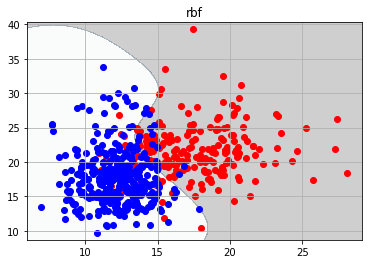

0.9120603015075377
0.9122807017543859


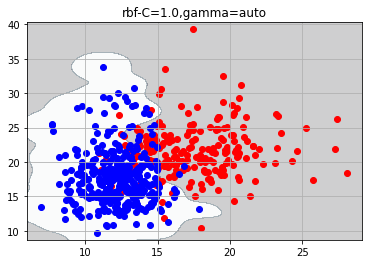

0.914572864321608
0.9064327485380117


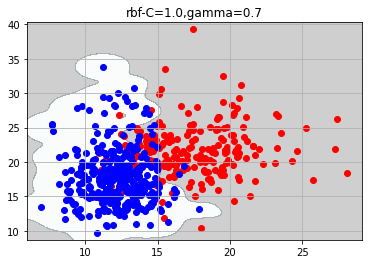

0.9170854271356784
0.9005847953216374


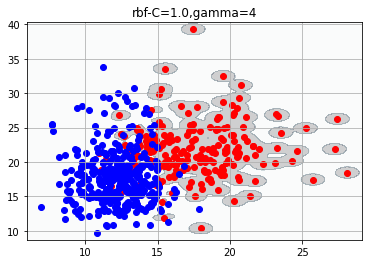

0.957286432160804
0.9298245614035088


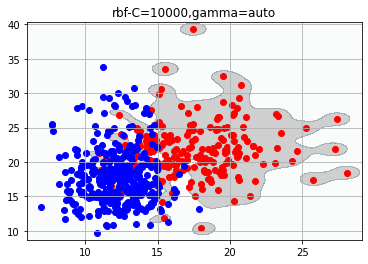

0.9899497487437185
0.9766081871345029


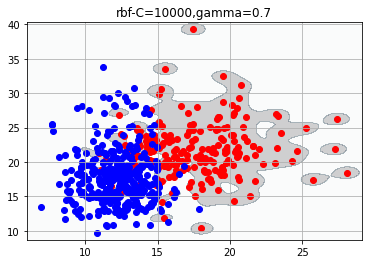

0.992462311557789
0.9883040935672515


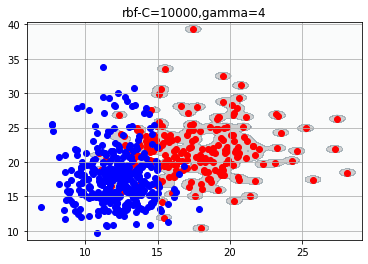

1.0
1.0


In [116]:
clf=svm.SVC(kernel='rbf')
clf.fit(training_data,training_labels)
SVM_plot(clf,'rbf')
print(clf.score(X_train,y_train))
print(clf.score(X_test, y_test))

C = [1.0,10000]
gamma = ['auto',0.7,4]

for i in range(len(C)):
    for j in range(len(gamma)):
        #print('C={0},gamma={1}'.format(C[i],gamma[j]))
        clf=svm.SVC(kernel='rbf',C=C[i],gamma=gamma[j])
        clf.fit(training_data,training_labels)
        SVM_plot(clf,'rbf-C={0},gamma={1}'.format(C[i],gamma[j]))
        print(clf.score(X_train,y_train))
        print(clf.score(X_test, y_test))

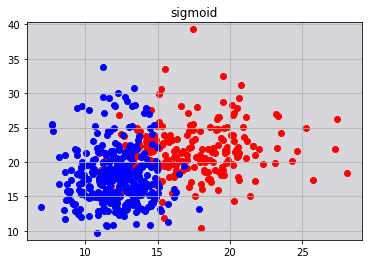

0.6080402010050251
0.672514619883041


In [94]:
clf=svm.SVC(kernel='sigmoid')
clf.fit(training_data,training_labels)
SVM_plot(clf,'sigmoid')
print(clf.score(X_train,y_train))
print(clf.score(X_test, y_test))

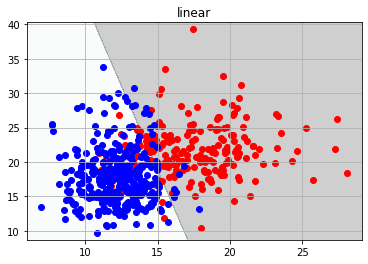

0.8919597989949749
0.8830409356725146


In [95]:
clf=svm.SVC(kernel='linear')
clf.fit(training_data,training_labels)
SVM_plot(clf,'linear')
print(clf.score(X_train,y_train))
print(clf.score(X_test, y_test))

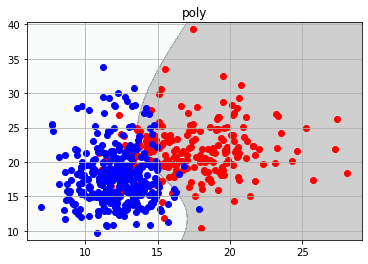

0.907035175879397
0.9005847953216374


In [96]:
clf=svm.SVC(kernel='poly')
clf.fit(training_data,training_labels)
SVM_plot(clf,'poly')
print(clf.score(X_train,y_train))
print(clf.score(X_test, y_test))

## 其他練習

In [122]:
breast_cancer=datasets.load_breast_cancer()
features=breast_cancer.data
target=breast_cancer.target

x = pd.DataFrame(breast_cancer['data'], columns=breast_cancer['feature_names'])
print(breast_cancer['data'].size)
print("feature_names: "+str(breast_cancer['feature_names']))
print("target_names: "+str(breast_cancer['target_names']))
y = pd.DataFrame(breast_cancer['target'], columns=['target'])
breast_cancer_data = pd.concat([x,y], axis=1)
breast_cancer_data = breast_cancer_data[['mean radius','mean texture','target']]
breast_cancer_data.head()


17070
feature_names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
target_names: ['malignant' 'benign']


,mean radius,mean texture,target
0,17.99,10.38,0
1,20.57,17.77,0
2,19.69,21.25,0
3,11.42,20.38,0
4,20.29,14.34,0


In [123]:
X_train, X_test, y_train, y_test = train_test_split(
    breast_cancer_data[['mean radius','mean texture']], breast_cancer_data['target'],test_size=0.3,random_state=0)
X_train.shape

(398, 2)

In [124]:
clf=svm.SVC(kernel='poly',gamma='auto',C=100)
clf.fit(X_train,y_train)

SVC(C=100, gamma='auto', kernel='poly')

In [125]:
#prediction
pred=clf.predict(X_test)
print(pred)

[1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1
 0 1 0 1 1 0 1 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 0
 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 0 1
 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 0
 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1]


In [126]:
#ground truth
print(y_test.values)

[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0
 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1]


In [127]:
error_index=np.where(pred!=y_test.values)[0]
error_index

array([  0,  11,  13,  15,  20,  35,  40,  47,  67,  84,  91,  92,  93,
       102, 136, 151, 157], dtype=int64)

In [128]:
#找出資料的原始位置
for i in error_index:
    print(X_test.index[i])

512
90
157
172
31
64
414
235
239
330
205
413
562
165
542
112
126


In [129]:
error_index=np.where(pred!=y_test.values)[0]
print('accuracy:',clf.score(X_test, y_test))
print('error_index:',error_index)
print('miss classification :',pred[error_index])#錯誤答案
data_index=X_test.iloc[error_index].index 
breast_cancer_data.iloc[data_index]#錯誤欄位的正確之原始資料

accuracy: 0.9005847953216374
error_index: [  0  11  13  15  20  35  40  47  67  84  91  92  93 102 136 151 157]
miss classification : [1 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1]


,mean radius,mean texture,target
512,13.40,20.52,0
90,14.62,24.02,1
157,16.84,19.46,1
172,15.46,11.89,0
31,11.84,18.70,0
64,12.68,23.84,0
414,15.13,29.81,0
235,14.03,21.25,1
239,17.46,39.28,0
330,16.03,15.51,0


C:\Users\changerica\Unit05_2\utility.py:79: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


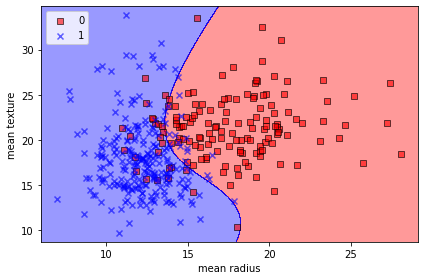

In [47]:
X_train_nd=X_train.values
plot_decision_regions(X_train_nd,y_train, classifier=clf)
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\changerica\Unit05_2\utility.py:79: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


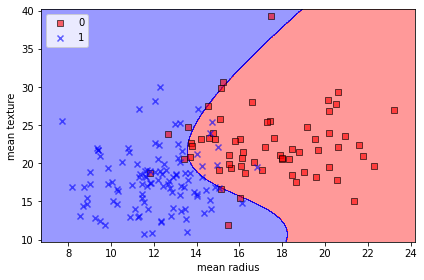

In [130]:
X_test_nd=X_test.values
plot_decision_regions(X_test_nd,y_test, classifier=clf)
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [131]:
print(clf.score(X_train,y_train))
print(clf.score(X_test, y_test))

0.8844221105527639
0.9005847953216374
